In [1]:
import tensorflow as tf

#what is raggedtensor what its purpose is?

**Scenario:**
You are building a chatbot model where each training example is a conversation between a user and the bot.

Each conversation has a different number of turns.

Each turn has a different number of tokens.

For example:

In [3]:
# Conversation 1: [["Hi"], ["Hello", "there"]]
# Conversation 2: [["How", "are", "you"], ["I", "am", "fine"], ["Great"]]
# Conversation 3: [["Bye"]]


- How would you represent this data in TensorFlow without forcing all turns to have the same length?

- Why would a normal Tensor not be sufficient?

- Write a short example using tf.RaggedTensor to represent these conversations.

A normal tf.Tensor requires uniform shape → we would need to pad all turns to the same token length and all conversations to the same number of turns, which wastes memory.
Instead, we can use a RaggedTensor:

In [4]:
import tensorflow as tf

# Each conversation has variable turns and variable tokens per turn
conversations = tf.ragged.constant([
    [["Hi"], ["Hello", "there"]],
    [["How", "are", "you"], ["I", "am", "fine"], ["Great"]],
    [["Bye"]]
])

print(conversations)
print("Shape:", conversations.shape)


<tf.RaggedTensor [[[b'Hi'], [b'Hello', b'there']],
 [[b'How', b'are', b'you'], [b'I', b'am', b'fine'], [b'Great']],
 [[b'Bye']]]>
Shape: (3, None, None)


In [5]:
rt = tf.ragged.constant([[1, 2, 3], [4, 5], [6]])
print(rt)

<tf.RaggedTensor [[1, 2, 3], [4, 5], [6]]>


 - Shape = (3, None) → second dimension is variable-length.
 -  No padding, memory efficient, directly models the data.

In [6]:
#Normal Tensor (requires padding)

In a normal tensor, all rows must be the same length → so we pad shorter sentences with a placeholder (like "PAD" or 0).

In [8]:
import tensorflow as tf

sentences_padded = tf.constant([
    ["I", "love", "AI", "PAD"],        # padded with "PAD"
    ["ChatGPT", "is", "awesome", "PAD"],
    ["Hi", "PAD", "PAD", "PAD"]
])

print(sentences_padded)
print("Shape:", sentences_padded.shape)


tf.Tensor(
[[b'I' b'love' b'AI' b'PAD']
 [b'ChatGPT' b'is' b'awesome' b'PAD']
 [b'Hi' b'PAD' b'PAD' b'PAD']], shape=(3, 4), dtype=string)
Shape: (3, 4)


In [9]:
#Shape = (3, 4) → rectangular.
#Wastes space because of "PAD".


**Demerits of RaggedTensors**

- Not Supported Everywhere

Many TensorFlow/Keras layers expect rectangular tensors.

Example: Dense, Conv2D, LSTM typically require uniform input.

You may need to call .to_tensor() (which reintroduces padding).

- Performance Overhead

Ragged structures require extra bookkeeping (row splits, indices).

For large datasets, operations may be slower than padded tensors.

- Complexity in Implementation

Indexing is trickier:

Tensor: tensor[0, 2]

RaggedTensor: rt[0][2] (nested indexing).

Debugging and visualization can be harder.

Limited Hardware Optimization

GPUs/TPUs are highly optimized for rectangular arrays.

RaggedTensors break this uniformity, so performance may not be optimal.

- Conversions Needed in Pipelines

When integrating with non-TF libraries (NumPy, PyTorch, Scikit-learn), RaggedTensors often need conversion to standard arrays → increases friction.

- Not Always Memory-Efficient

While they save memory compared to padding to max sequence length,

If most rows are similar in size, using RaggedTensors may not save much, and rectangular tensors may be faster.

# a real-world scenario where RaggedTensor is bad to use

In [12]:
# import tensorflow as tf

# Ragged representation (BAD idea)
images = tf.ragged.constant([
    [[1, 2], [3, 4]],     # 2×2 image
    [[5, 6, 7], [8, 9, 10]]  # 2×3 image
])
print(images)


<tf.RaggedTensor [[[1, 2], [3, 4]],
 [[5, 6, 7], [8, 9, 10]]]>


This creates a ragged batch of images (2×2 vs 2×3).
But CNN layers like Conv2D require uniform height × width × channels.
So, you’d be forced to call .to_tensor() → which pads the data anyway

RaggedTensor gives no benefit, only extra complexity.

Rule of Thumb: -RT is

- Good for: Variable-length sequences (sentences, user clicks, events).

- Bad for: Fixed-shape data (images, audio spectrograms, structured tables).

In [10]:
images = tf.constant([
    [[1, 2], [3, 4]],
    [[5, 6], [7, 8]]
])

In [11]:
print(images)

tf.Tensor(
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]], shape=(2, 2, 2), dtype=int32)


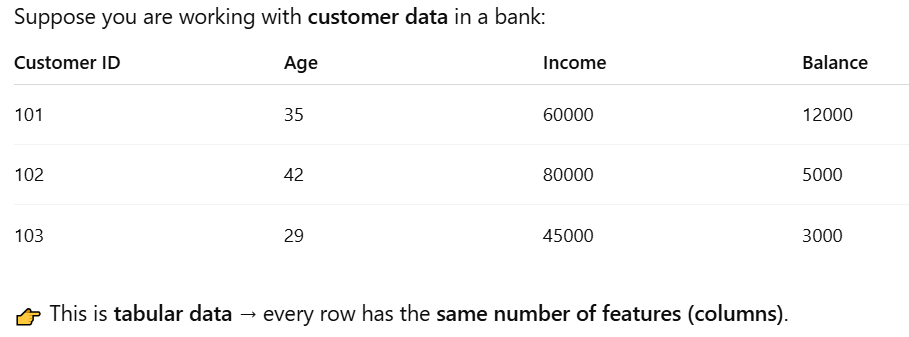

In [13]:

# BAD: making this ragged
data = tf.ragged.constant([
    [35, 60000, 12000],
    [42, 80000, 5000],
    [29, 45000, 3000]
])
print(data)


<tf.RaggedTensor [[35, 60000, 12000],
 [42, 80000, 5000],
 [29, 45000, 3000]]>


Even though it works, there is no benefit in using RaggedTensor —
all rows already have the same number of columns.

Many ML models (Dense, RandomForest, LogisticRegression) expect rectangular tensors.
You’d just add complexity and possible conversion steps.


### One liner

“If the data is already fixed-size, I stick with a normal tensor. If it’s variable-length, like sentences or user histories, I use RaggedTensor. But if I need to feed it into a layer that requires rectangular input, I convert it back with .to_tensor().”

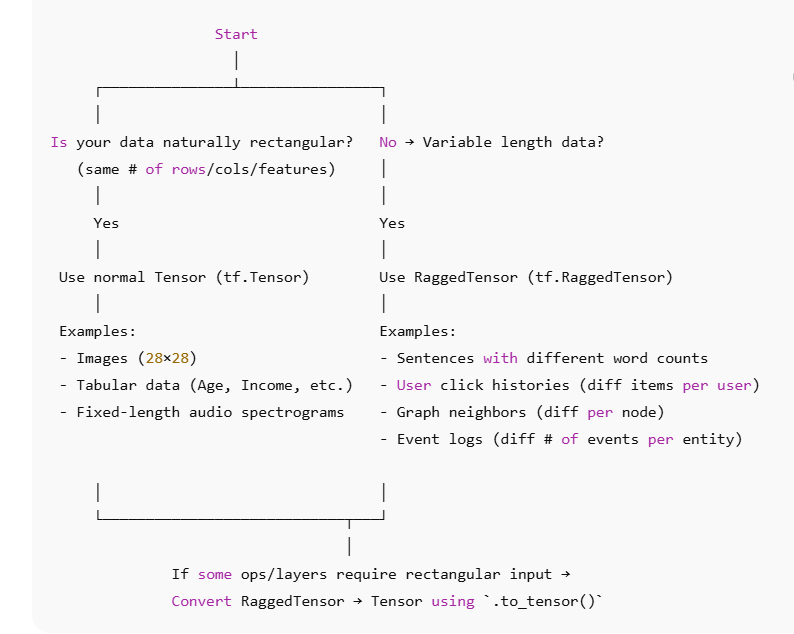